In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [75]:
# 1. 데이터 불러오기 함수
def load_motion_data(folder_path, label):
    data = []
    for file in os.listdir(folder_path):
        if file.endswith('.npy'):
            file_path = os.path.join(folder_path, file)
            data.append(np.load(file_path))
    return np.array(data), [label] * len(data)

In [76]:
# 2. 데이터 읽기 (back, side, squat)
back_folder = r'C:/Users/Admin/Desktop/motion_data/back/좌표'
side_folder = r'C:/Users/Admin/Desktop/motion_data/side/좌표'
squat_folder = r'C:/Users/Admin/Desktop/motion_data/squat/좌표'

back_data, back_labels = load_motion_data(back_folder, 'back')
side_data, side_labels = load_motion_data(side_folder, 'side')
squat_data, squat_labels = load_motion_data(squat_folder, 'squat')


In [77]:
# 3. 데이터 병합
X = np.vstack((back_data, side_data, squat_data))
y = np.array(back_labels + side_labels + squat_labels)

In [78]:
# 4. 데이터 스케일링
X_flat = X.reshape(X.shape[0], -1)  # 각 샘플을 1D로 변환
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

In [79]:
# 5. PCA 적용
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [85]:
print("Explained Variance Ratio (설명된 분산 비율):")
print(pca.explained_variance_ratio_)

print("\nCumulative Explained Variance (누적 설명된 분산 비율):")
print(pca.explained_variance_ratio_.cumsum())

print("\nPrincipal Components (주성분 벡터):")
print(pca.components_)

print("\nExplained Variance (설명된 분산):")
print(pca.explained_variance_)

Explained Variance Ratio (설명된 분산 비율):
[0.4291536  0.19581083 0.09931724 0.05163361 0.04126305 0.01728784
 0.01537246 0.01402282 0.01295046 0.01034612]

Cumulative Explained Variance (누적 설명된 분산 비율):
[0.4291536  0.62496442 0.72428166 0.77591527 0.81717831 0.83446616
 0.84983862 0.86386144 0.87681189 0.88715801]

Principal Components (주성분 벡터):
[[ 0.01247251 -0.01039961  0.00726642 ...  0.00780473  0.01227535
  -0.0052617 ]
 [ 0.00182772 -0.00731246 -0.01327565 ... -0.0089285  -0.00269111
   0.01165029]
 [ 0.01031876  0.00943773 -0.0043328  ...  0.01513668 -0.01197204
   0.00635536]
 ...
 [-0.00669454  0.00719463  0.00531139 ...  0.00114158 -0.00307563
   0.01114565]
 [ 0.00083889 -0.01276107 -0.00522015 ... -0.00264036  0.0048718
   0.01769631]
 [ 0.00637159  0.0057887   0.01045216 ...  0.02029755  0.00413778
   0.0073456 ]]
<bound method BaseEstimator.get_params of PCA(n_components=10)>

Explained Variance (설명된 분산):
[5132.56179412 2341.84491424 1187.80747916  617.52409045  493.49497386
 

In [81]:
# 6. t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

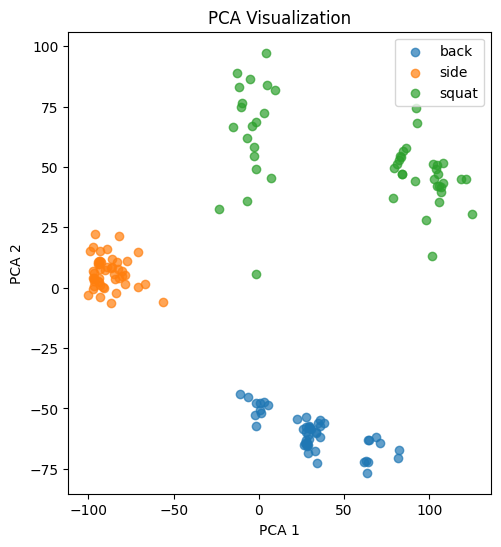

In [82]:
# 7. 시각화 (PCA)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for label in np.unique(y):
    idx = np.where(y == label)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label, alpha=0.7)
plt.title("PCA Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()

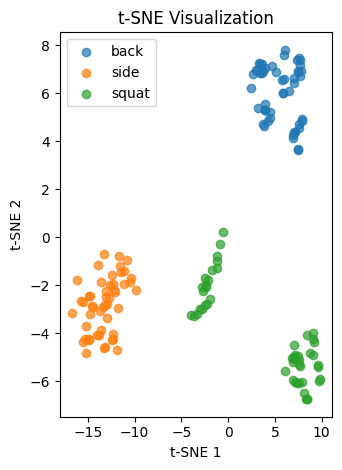

In [83]:
# 8. 시각화 (t-SNE)
plt.subplot(1, 2, 2)
for label in np.unique(y):
    idx = np.where(y == label)
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=label, alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()

plt.tight_layout()
plt.show()